In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv ("E:\MScFT\Semester 3\AI in Finance\_Practicals\exam\Heart_Disease_Prediction.csv")

# Features and target variable
X = data[['Age', 'Cholesterol', 'Max HR']]
y = data['Heart Disease']
# print(data)
# print(X)
# print(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [39]:
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[35 14]
 [14 18]]

Classification Report :
              precision    recall  f1-score   support

     Absence       0.71      0.71      0.71        49
    Presence       0.56      0.56      0.56        32

    accuracy                           0.65        81
   macro avg       0.64      0.64      0.64        81
weighted avg       0.65      0.65      0.65        81



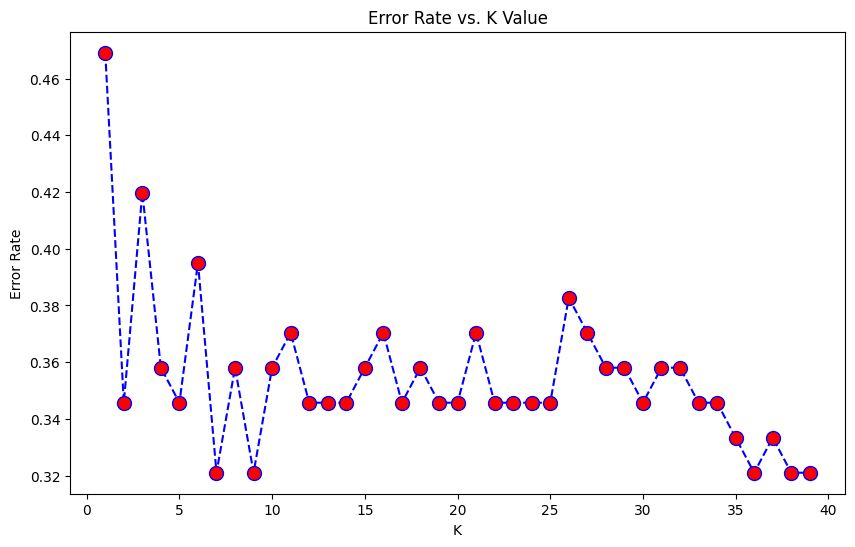

In [40]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
